In [10]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Import Statements

In [11]:
import json
import numpy as np
import pandas as pd
import requests

from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from pprint import pprint
from scipy.stats import linregress

## Bank Assets Data

In [12]:
bank_assets_url = "https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CASSET%2CCHBAL%2CSC%2CFREPO%2CLNLSNET%2CLNRE%2CTRADE%2CBKPREM%2CORE%2CINTAN%2CAOA%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"
bank_asset = requests.get(bank_assets_url).json()

### Create Combined Data from the API response

In [13]:
# Create a list to hold the data of each financial asset
combined_asset_data = []

# loop through the data details of the dictionary 
for asset in bank_asset['data']:
        
        # For simplicity, let's assign assets' data component as asset 
        asset = asset['data']

        # Fetch all the relevant data elements from the each asset
        reporting_date = asset["REPDTE"]
        total_asset = asset["ASSET"]
        certificate = asset["CERT"]
        bank_name = asset["NAME"]
        cash_balance = asset["CHBAL"]
        securities = asset["SC"]
        federal_repurchase_option_rate = asset["FREPO"]
        net_loans_leases = asset["LNLSNET"]
        real_estate_loan = asset["LNRE"]
        bank_premises_fixed_asset = asset["BKPREM"]
        other_real_estate_owned = asset["ORE"]
        good_will_other_intangibles = asset["INTAN"]
        all_other_assets = asset["AOA"]
        
        # Append the fetched data as a dictionary (row in a dataframe eventually) to the list
        combined_asset_data.append({
            "Reporting Date": reporting_date,
            "Bank Name": bank_name,
            "Bank Certificate #": certificate,
            "Total Asset": total_asset,
            "Cash and Balances due from Depository Institutions": cash_balance,
            "Securities": securities,
            "Federal Funds Sold & Reverse Repurchase Agreements": federal_repurchase_option_rate,
            "Net Loans Lease": net_loans_leases,
            "All Real Estate Loans": real_estate_loan,
            "Bank Premises and Fixed Assets": bank_premises_fixed_asset,
            "Other Real Estate Owned": other_real_estate_owned,
            "Goodwill and Other Intangibles": good_will_other_intangibles,
            "All Other Asset": all_other_assets
        })

### Convert the Combined Data into a Pandas DataFrame

In [14]:
# Create bank assets dataframe from the combined assets data           
bank_asset = pd.DataFrame(combined_asset_data)

# Convert 'Reporting Date' column to datetime64
bank_asset['Reporting Date'] = pd.to_datetime(bank_asset['Reporting Date'])

# Sort the DataFrame based on 'Reporting Date' column in ascending order
bank_asset = bank_asset.sort_values('Reporting Date')

# Reset the index
bank_asset = bank_asset.reset_index(drop=True)

# Display bank assets dataframe 
bank_asset.head()

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset
0,2012-06-30,CITIBANK NATIONAL ASSN,7213,1347841000,172522000,254308000,71198000,573969000,195686000,4553000,348000,18532000,81484000
1,2012-06-30,GOLDMAN SACHS BANK USA,33124,114693000,44086000,0,11128000,13810000,2586000,0,0,4000,7488000
2,2012-06-30,BANK OF AMERICA NA,3510,1445093157,136863710,328771279,16586665,702943873,412263790,10253110,2501993,63950326,105268172
3,2012-06-30,JPMORGAN CHASE BANK NA,628,1812825000,176095000,342767000,247782000,594303000,275976000,10424000,2050000,35762000,116341000
4,2012-06-30,FIRST REPUBLIC BANK,59017,30987001,800818,3105339,19330,25034919,22526845,126297,3490,168475,1710899


## Part 1: 

- a) Create stacked bar chart
- b) Liquidity ration
- c) Pie chart analysis of current asset vs. non-current

#### Current asset = Cash and balances due from depository institutions + securities

In [15]:
bank_asset["Current Asset"] = bank_asset["Cash and Balances due from Depository Institutions"] + bank_asset["Securities"]

#### Curret Asset Ratio =  Current Asset  / Total Asset

In [16]:
bank_asset["Curret Asset Ratio"] = bank_asset["Current Asset"] / bank_asset["Total Asset"]

#### Display the Bank Assets DataFrame with new changes

In [17]:
bank_asset.head()

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset,Current Asset,Curret Asset Ratio
0,2012-06-30,CITIBANK NATIONAL ASSN,7213,1347841000,172522000,254308000,71198000,573969000,195686000,4553000,348000,18532000,81484000,426830000,0.316677
1,2012-06-30,GOLDMAN SACHS BANK USA,33124,114693000,44086000,0,11128000,13810000,2586000,0,0,4000,7488000,44086000,0.384383
2,2012-06-30,BANK OF AMERICA NA,3510,1445093157,136863710,328771279,16586665,702943873,412263790,10253110,2501993,63950326,105268172,465634989,0.322218
3,2012-06-30,JPMORGAN CHASE BANK NA,628,1812825000,176095000,342767000,247782000,594303000,275976000,10424000,2050000,35762000,116341000,518862000,0.286217
4,2012-06-30,FIRST REPUBLIC BANK,59017,30987001,800818,3105339,19330,25034919,22526845,126297,3490,168475,1710899,3906157,0.126058


In [9]:
# Total assets = Cash and balances due from depository institutions + securities + Net Loans and leases + Other Real Estates Owned + Goodwill and other Intangibles
# Current asset = Cash and balances due from depository institutions + securities
# Create dataframe of each bank of the current asset vs. total asset

In [10]:
# Create a stack bar chart with the compositon of the asset.
# Total Asset = Cash and Balances due from Depository Institutions + Securities + Net Loans Lease + Federal funds sold & revenue repurchase agreements + Trading account assets + Banking premises and fixed assets + Other real estate owned+ Goodwill and other intangibles + All other assets

### Asset Ratio Over Time vs Reporting Date 

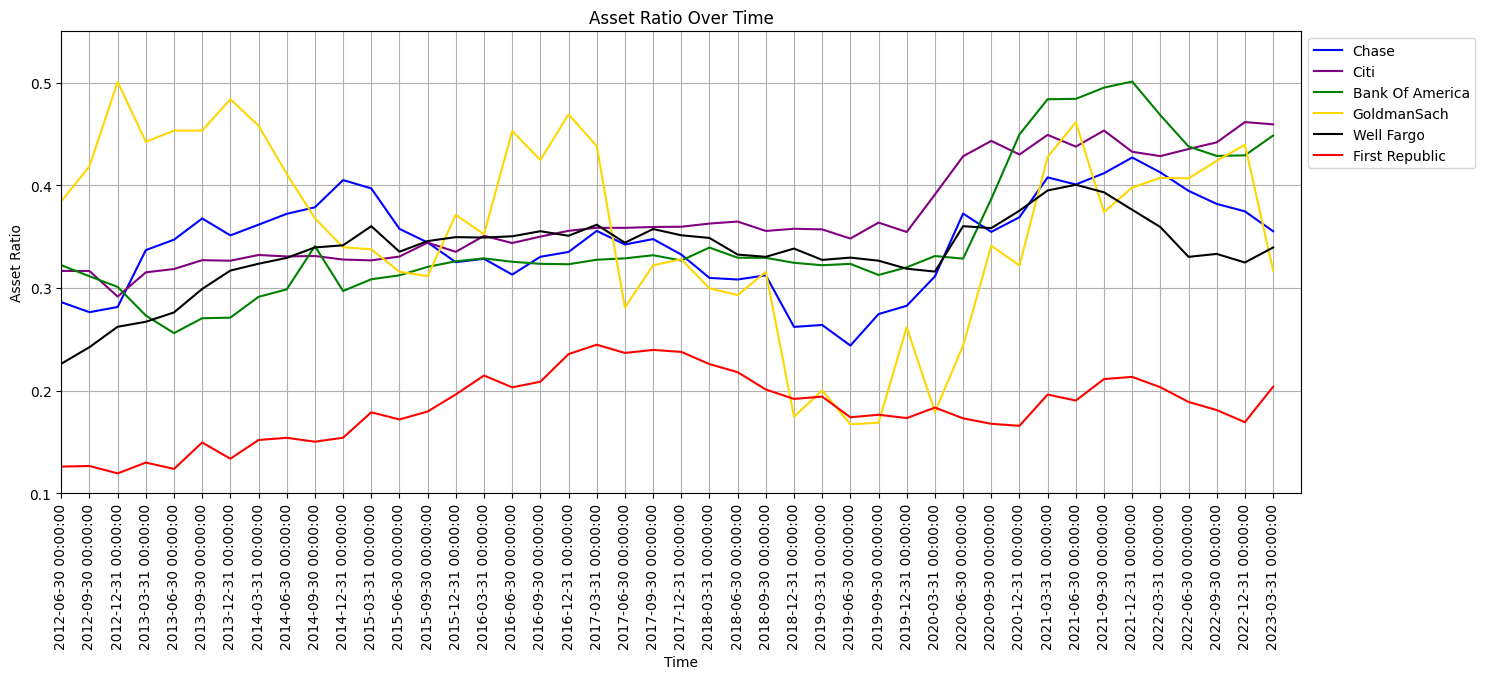

In [18]:
# Plot current asset ratio over time for the six banks, time=np.arange(1, len(new_bank_asset["Reporting Date"].unique()) + 1, 1)
plt.figure(figsize=(16, 6))
x_axis = np.arange(len(bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# time
Chase, = plt.plot(x_axis, bank_asset.loc[(bank_asset["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Curret Asset Ratio"], color="blue", label="Chase")
Citi, = plt.plot(x_axis, bank_asset.loc[(bank_asset["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Curret Asset Ratio"], color="purple", label="Citi")
BOA, = plt.plot(x_axis, bank_asset.loc[(bank_asset["Bank Name"]=="BANK OF AMERICA NA"),"Curret Asset Ratio"], color="green", label="Bank Of America")
GoldmanSachs, = plt.plot(x_axis, bank_asset.loc[(bank_asset["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Curret Asset Ratio"], color="gold", label="GoldmanSach")
Wells_Fargo, = plt.plot(x_axis, bank_asset.loc[(bank_asset["Bank Name"]=="WELLS FARGO BANK NA"),"Curret Asset Ratio"], color="black", label="Well Fargo")
First_republic, = plt.plot(x_axis, bank_asset.loc[(bank_asset["Bank Name"]=="FIRST REPUBLIC BANK"),"Curret Asset Ratio"], color="red", label="First Republic")
plt.xticks(tick_locations, bank_asset["Reporting Date"].unique(), rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Asset Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Asset Ratio")

# Add limits to x axis and y-axis
plt.xlim(0,44)
plt.ylim(0.1,0.55)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

### Net Loans Lease Over Time vs Reporting Date

In [20]:
# Define a function to format y-axis labels
def format_y_axis_labels(value, _):
    if value >= 1000:
        value = f"{int(value/1000)}K"
    return value

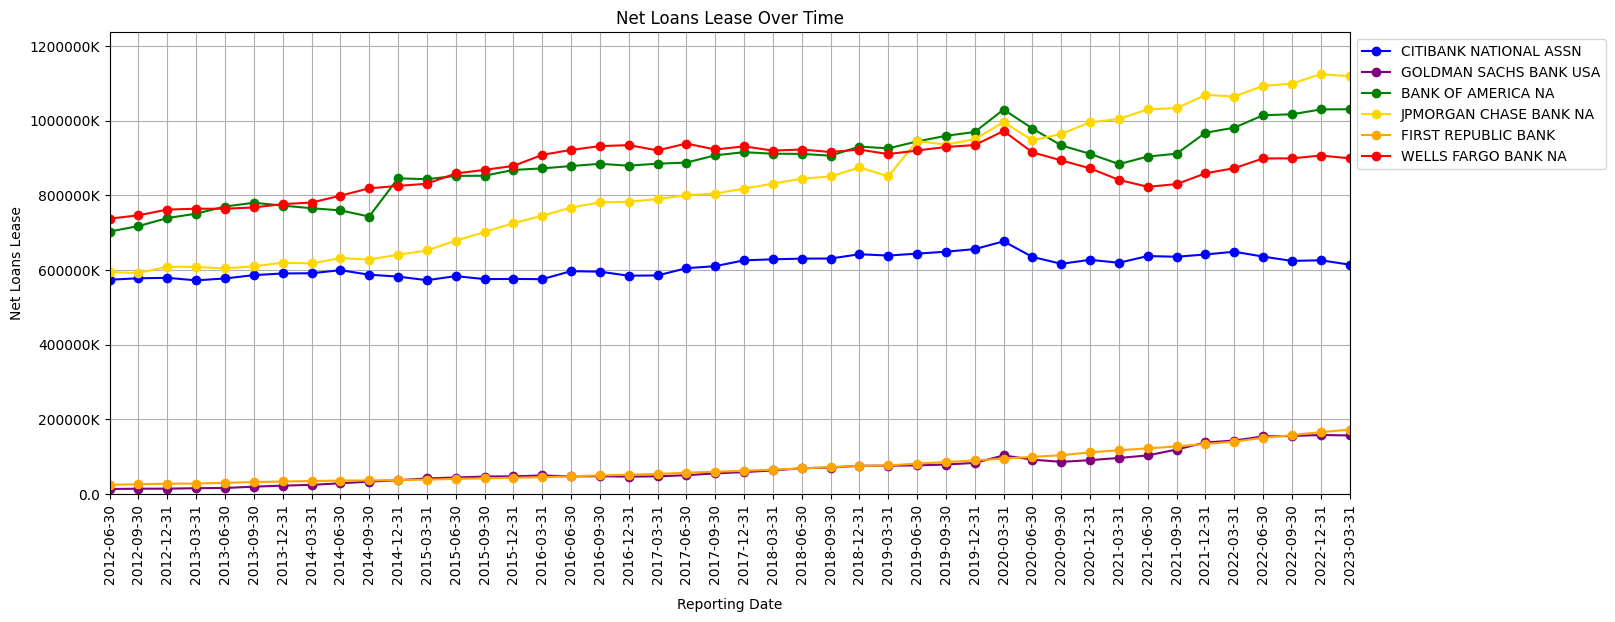

In [50]:
# Get the list of unique banks
bank_names = bank_asset["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_asset.loc[bank_asset["Bank Name"] == bank, "Net Loans Lease"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Net Loans Lease Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Net Loans Lease")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_asset["Net Loans Lease"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [ ]:
# from 2012 to 2023 highest change
# first2020 lockdown there is a peak for all of the banks and chase was the 2nd biggest and after lockdown chase is the highest
#1. Over the period from 2012 to 2023, JP Morgan Chase exhibited the highest growth rate compared to other banks. It consistently demonstrated strong performance and steady growth throughout this timeframe.

#2. During the onset of the COVID-19 lockdown, there was a slight upward spike in JP Morgan Chase's performance, placing it as the second-highest performer among its peer banks. This indicates the bank's resilience and ability to navigate challenging market conditions.

#3. Following the easing of COVID-19 lockdown measures, JP Morgan Chase experienced remarkable growth and emerged as the top-performing bank. Its performance surpassed that of its competitors, positioning it as a leader in the industry. As of the last quarter in March 2023, JP Morgan Chase continues to maintain its prominent position in the market.

#These statements highlight JP Morgan Chase's strong performance and growth trajectory over the specified period, particularly during the COVID-19 lockdown and its aftermath.

### All Real Estate Loans vs Reporting Date

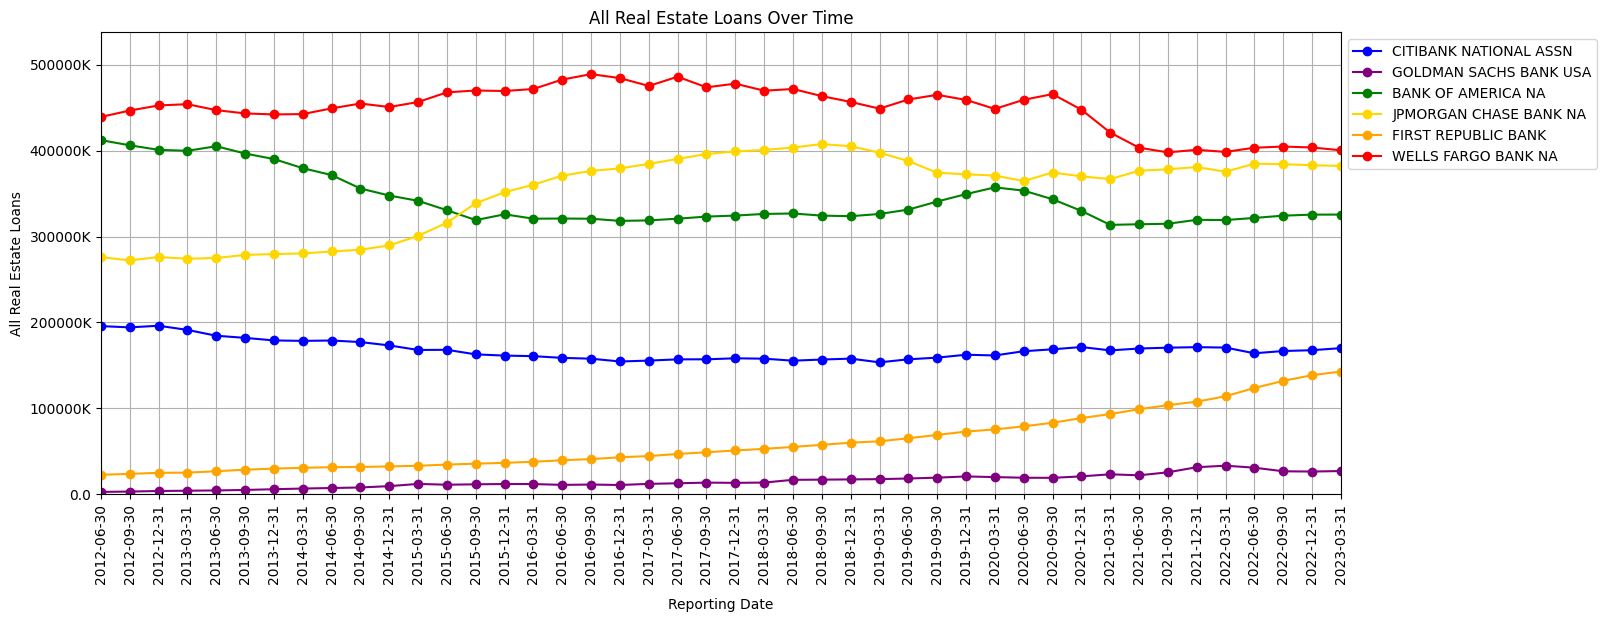

In [51]:
# Get the list of unique banks
bank_names = bank_asset["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_asset.loc[bank_asset["Bank Name"] == bank, "All Real Estate Loans"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("All Real Estate Loans Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("All Real Estate Loans")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_asset["All Real Estate Loans"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Bank Premises and Fixed Assets vs Reporting Date

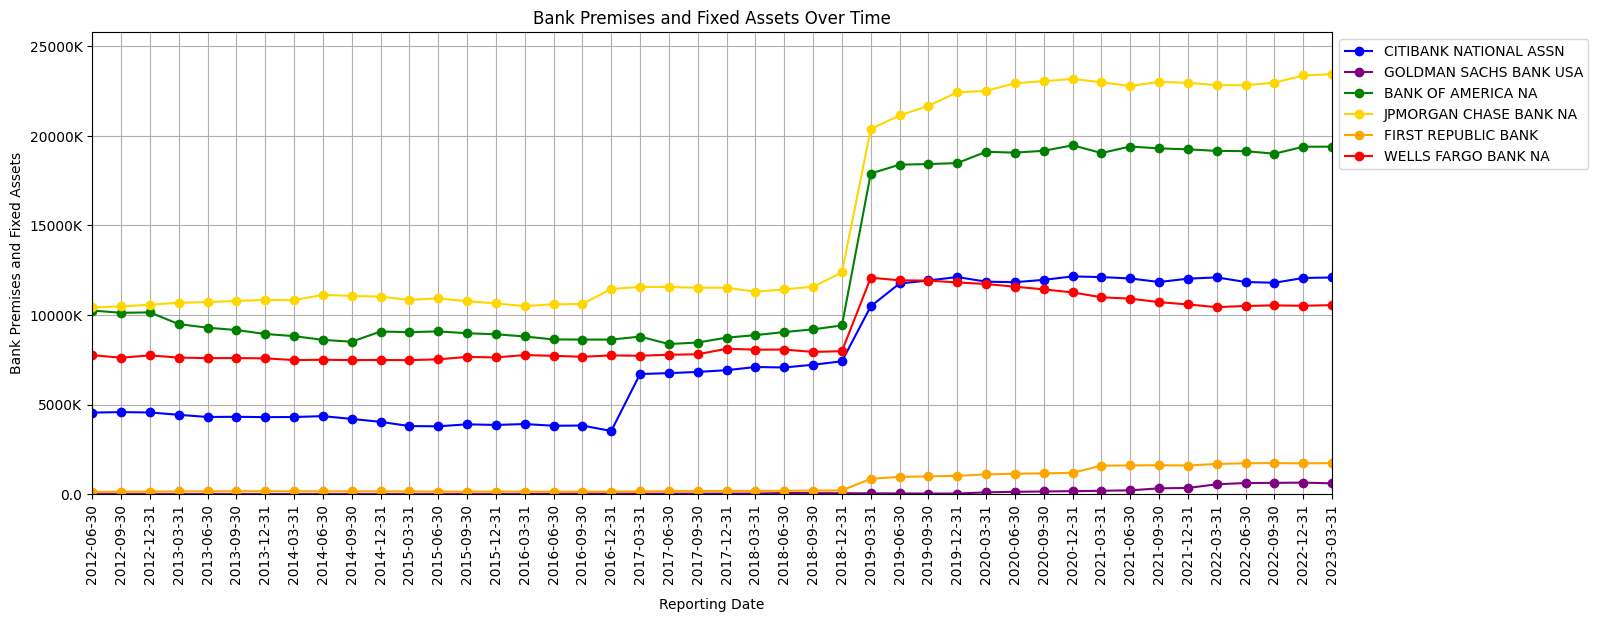

In [52]:
# Get the list of unique banks
bank_names = bank_asset["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_asset.loc[bank_asset["Bank Name"] == bank, "Bank Premises and Fixed Assets"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Bank Premises and Fixed Assets Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Bank Premises and Fixed Assets")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_asset["Bank Premises and Fixed Assets"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Other Real Estate Owned vs Reporting Date

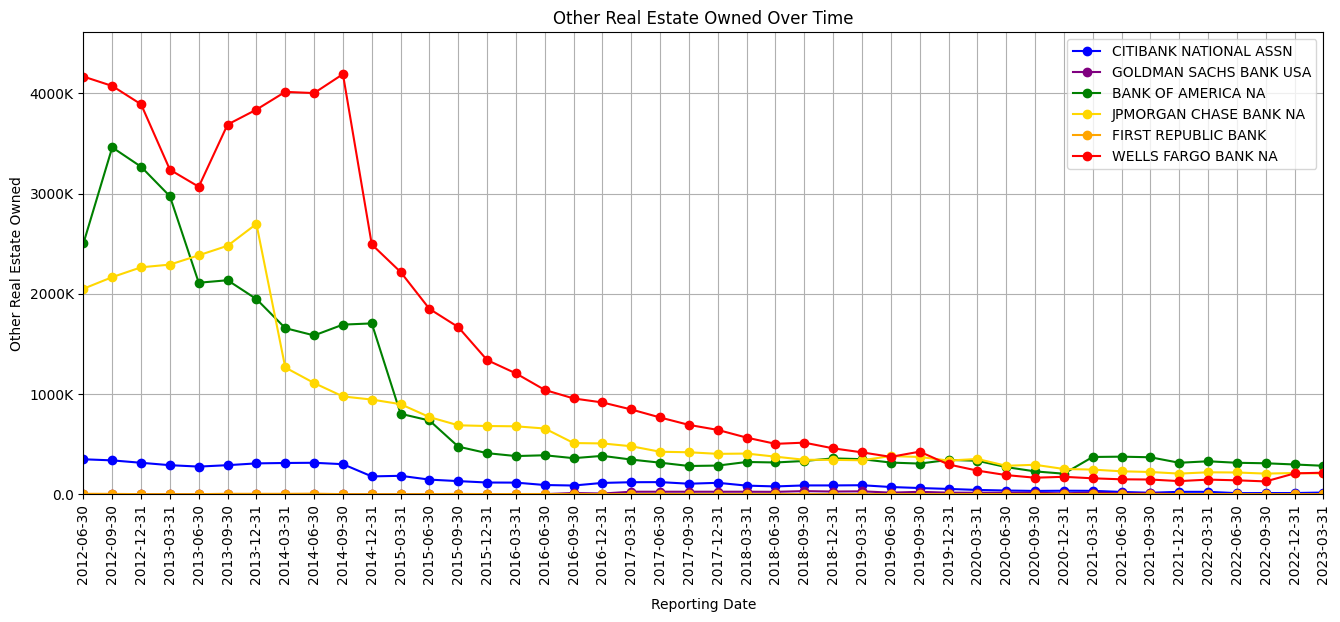

In [53]:
# Get the list of unique banks
bank_names = bank_asset["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_asset.loc[bank_asset["Bank Name"] == bank, "Other Real Estate Owned"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Other Real Estate Owned Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Other Real Estate Owned")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_asset["Other Real Estate Owned"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Goodwill and Other Intangibles vs Reporting Date

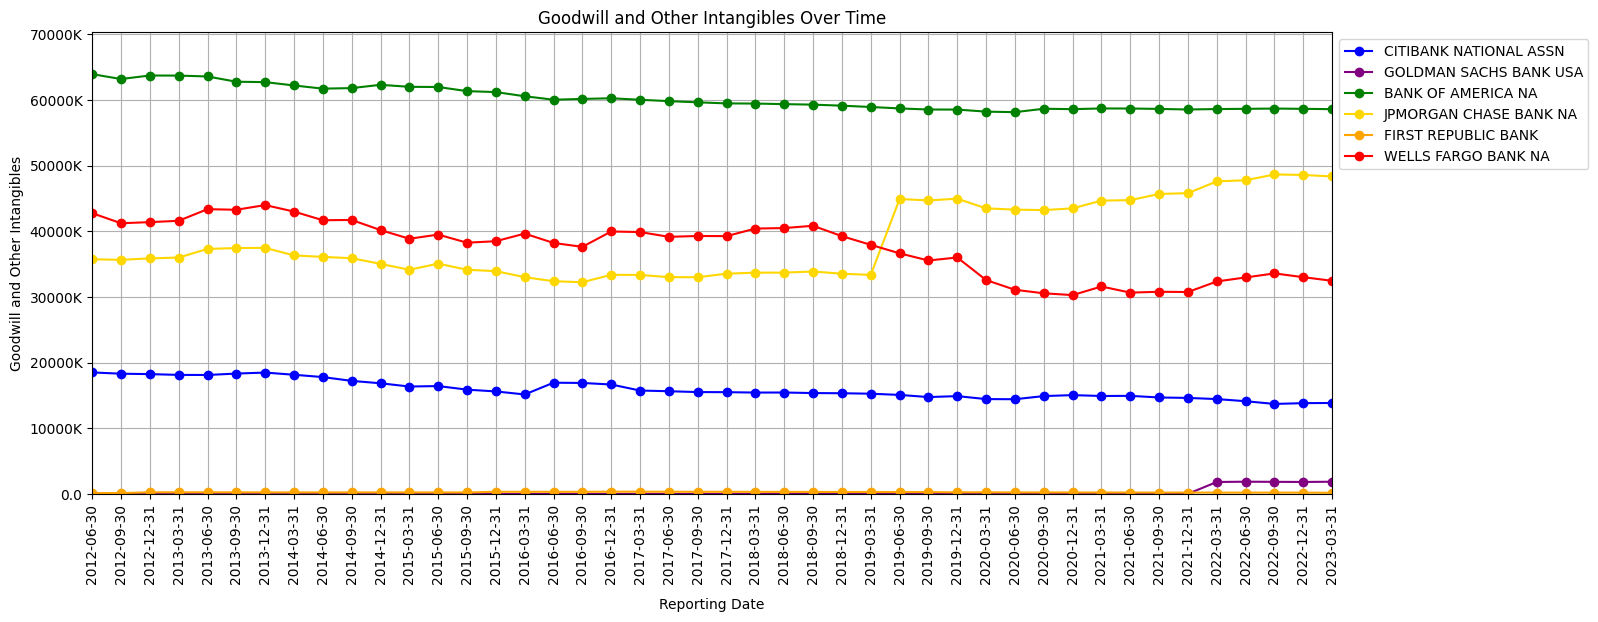

In [54]:
# Get the list of unique banks
bank_names = bank_asset["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_asset.loc[bank_asset["Bank Name"] == bank, "Goodwill and Other Intangibles"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Goodwill and Other Intangibles Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Goodwill and Other Intangibles")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_asset["Goodwill and Other Intangibles"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### All Other Asset vs Reporting Date

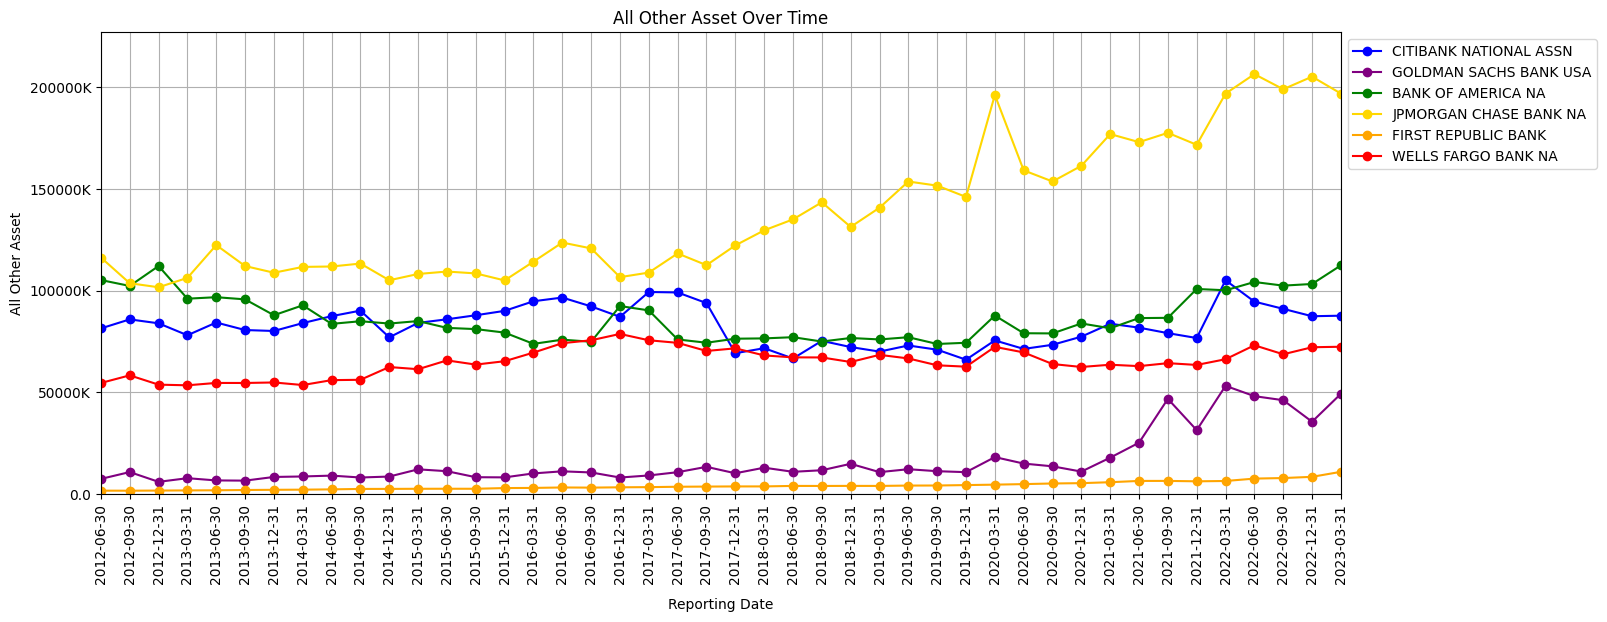

In [55]:
# Get the list of unique banks
bank_names = bank_asset["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_asset.loc[bank_asset["Bank Name"] == bank, "All Other Asset"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("All Other Asset Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("All Other Asset")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_asset["All Other Asset"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Current Asset vs Reporting Date

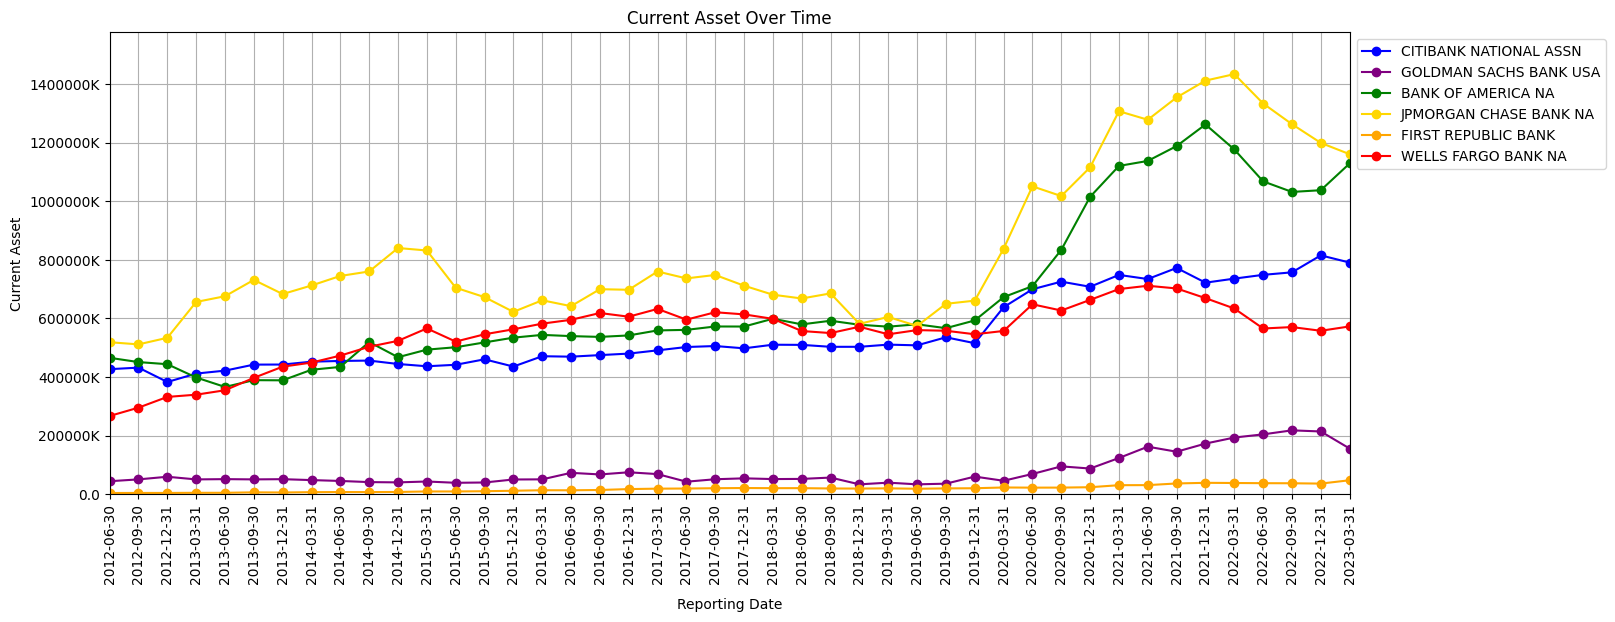

In [56]:
# Get the list of unique banks
bank_names = bank_asset["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_asset.loc[bank_asset["Bank Name"] == bank, "Current Asset"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Current Asset Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Current Asset")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = bank_asset["Current Asset"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Curret Asset Ratio vs Reporting Date

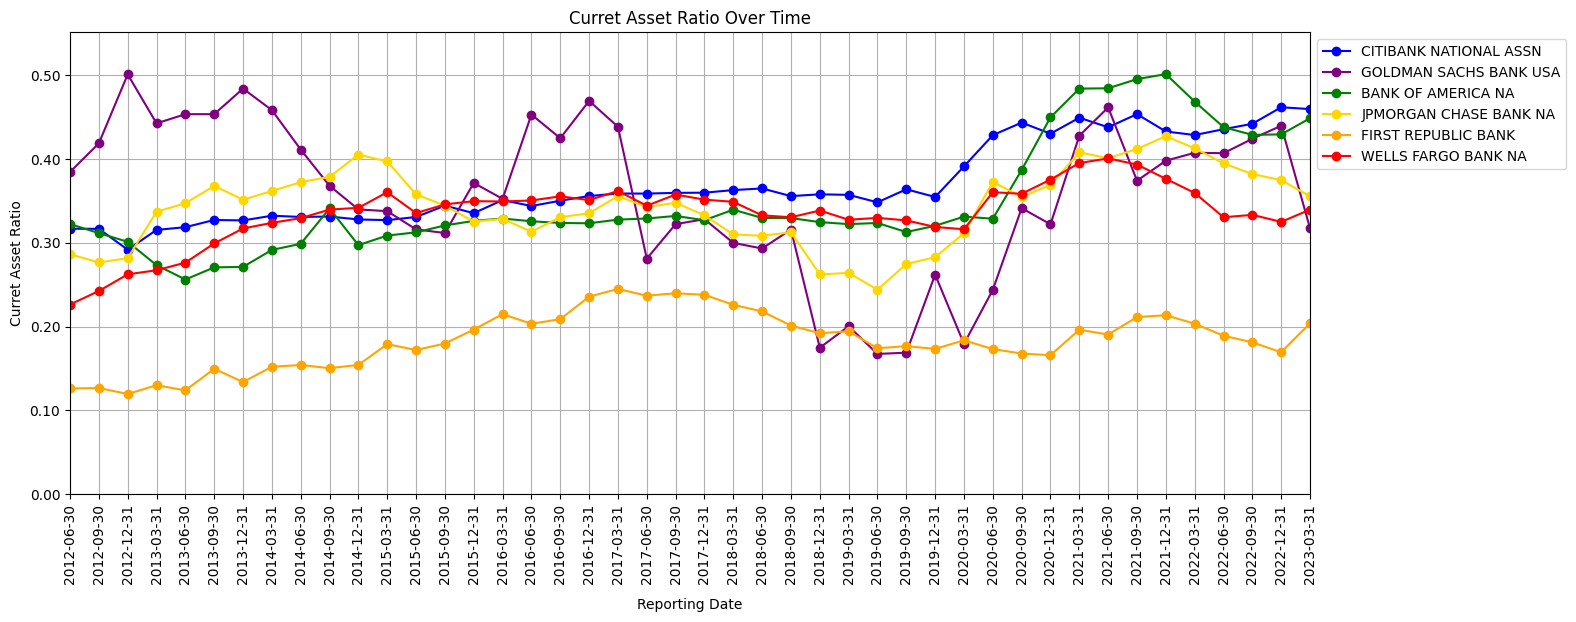

In [57]:
# Get the list of unique banks
bank_names = bank_asset["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = bank_asset.loc[bank_asset["Bank Name"] == bank, "Curret Asset Ratio"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)
    
# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Curret Asset Ratio Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Curret Asset Ratio")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))  # Display two decimal places

# Set y-axis limits
max_value = bank_asset["Curret Asset Ratio"].max()
plt.ylim(0, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Create a pie chart of the Chase's avg current asset and other assets

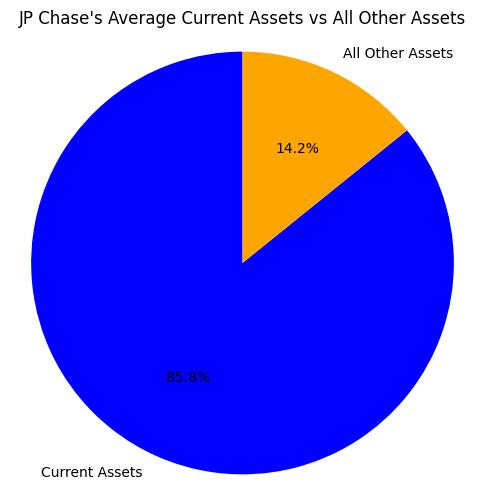

In [28]:
# Calculate average current asset and other assets for JP Chase
chase_filter = (bank_asset["Bank Name"] == "JPMORGAN CHASE BANK NA")
jp_chase_current_asset_avg = bank_asset.loc[chase_filter, "Current Asset"].mean()
jp_chase_other_assets_avg = bank_asset.loc[chase_filter, "All Other Asset"].mean()

# Create data for the pie chart
sizes = [jp_chase_current_asset_avg, jp_chase_other_assets_avg]
labels = ["Current Assets", "All Other Assets"]
colors = ["blue", "orange"]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
plt.title("JP Chase's Average Current Assets vs All Other Assets")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

## Bank Liabilities Data

In [29]:
bank_liabilites_url = "https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CDEP%2CDEPDOM%2CDEPFOR%2CFREPP%2CTRADEL%2COTHBRF%2CALLOTHL%2CEQTOT%2CNAME%2CLIABEQ%2CLIAB&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"
bank_liabilites = requests.get(bank_liabilites_url).json()

### Create Combined Data from the API response

In [30]:
# Create a list to hold the data of each financial liabilites
combined_liabilites_data = []

for liability in bank_liabilites['data']:
    
        # For simplicity, let's assign liability' data component as liability 
        liability = liability['data']
        
        reporting_date = liability["REPDTE"]
        certificate = liability["CERT"]
        bank_name = liability["NAME"]
        total_liabilites_and_capitals = liability["LIABEQ"]
        total_liabilities = liability["LIAB"]
        total_deposit = liability["DEP"]
        total_deposits_in_domestic_offices = liability["DEPDOM"]
        total_deposits_in_foreign_offices = liability["DEPFOR"]
        all_other_liabilities = liability["ALLOTHL"]
        total_equity_capital = liability["EQTOT"]
        federal_repurchase_option_rate = liability["FREPP"]
        trading_liabilities = liability["TRADEL"]
        other_borrowed_funds = liability["OTHBRF"]

        # Append the fetched data as a dictionary (row in a dataframe eventually) to the list
        combined_liabilites_data.append({
            "Reporting Date": reporting_date,
            "Bank Name": bank_name,
            "Bank Certificate #": certificate,
            "Total Liabilites and capitals": total_liabilites_and_capitals,
            "Total Liabilites":total_liabilities,
            "Total Deposit": total_deposit,
            "Total Domestic Deposit": total_deposits_in_domestic_offices,
            "Total Foreign Deposit": total_deposits_in_foreign_offices,
            "All other Liabilities": all_other_liabilities,
            "Total EquityCapital": total_equity_capital,
            "Federal funds purchased and repurchase agreements": federal_repurchase_option_rate,
            "Trading Liabilites": trading_liabilities,
            "Other borrowed funds": other_borrowed_funds
        })

### Convert the Combined Data into a Pandas DataFrame

In [31]:
# Create bank liabilites dataframe from the combined liabilites data           
new_bank_liabilites = pd.DataFrame(combined_liabilites_data)

# Convert 'Reporting Date' column to datetime64
new_bank_liabilites['Reporting Date'] = pd.to_datetime(new_bank_liabilites['Reporting Date'])

# Sort the DataFrame based on 'Reporting Date' column in ascending order
new_bank_liabilites = new_bank_liabilites.sort_values('Reporting Date')

# Reset the index
new_bank_liabilites = new_bank_liabilites.reset_index(drop=True)

# Display bank assets dataframe 
new_bank_liabilites.head()

,Reporting Date,Bank Name,Bank Certificate #,Total Liabilites and capitals,Total Liabilites,Total Deposit,Total Domestic Deposit,Total Foreign Deposit,All other Liabilities,Total EquityCapital,Federal funds purchased and repurchase agreements,Trading Liabilites,Other borrowed funds
0,2012-06-30,CITIBANK NATIONAL ASSN,7213,1347841000,1192463000,950510000,386149000,564361000.0,56476000,155378000,21726000,60983000,102768000
1,2012-06-30,GOLDMAN SACHS BANK USA,33124,114693000,94738000,53774000,53774000,0.0,9878000,19955000,16745000,13822000,519000
2,2012-06-30,BANK OF AMERICA NA,3510,1445093157,1265806391,1062273625,991685005,70588620.0,25374938,179286766,80222077,40184413,39536551
3,2012-06-30,JPMORGAN CHASE BANK NA,628,1812825000,1676378000,1162998000,832455000,330543000.0,80160000,136447000,188478000,128307000,87465000
4,2012-06-30,FIRST REPUBLIC BANK,59017,30987001,27930388,24215303,24215303,NaN,431367,3056613,0,15791,3203581


## Bank Performance 

In [32]:
bank_performance_url = "https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CROE%2CROA%2CNIMY%2CEEFFR%2CLNLSNTV%2CLNLSDEPR%2CIDLNCORR%2CDEPDASTR%2CIDT1RWAJR%2CRBC1AAJ%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"
bank_performace = requests.get(bank_performance_url).json()

### Create Combined Data from the API response

In [33]:
# Create a list to hold the data of each bank performances
combined_performance_data = []

for performace in bank_performace['data']:
    
        # For simplicity, let's assign liability' data component as liability 
        performace = performace['data']
        
        reporting_date = performace["REPDTE"]
        certificate = performace["CERT"]
        bank_name = performace["NAME"]
        net_interest_margin = performace["NIMY"]
        return_on_assets = performace["ROA"]
        return_on_equity = performace["ROE"]
        efficiency_ratio = performace["EEFFR"]
        net_loans_leases_to_assets = performace["LNLSNTV"]
        net_loans_leases_to_deposits = performace["LNLSDEPR"]
        net_loans_leases_to_core_deposit = performace["IDLNCORR"]
        domestic_deposits_to_total_assets = performace["DEPDASTR"]
        tier_1_risk_based_capital_ratio = performace["IDT1RWAJR"]
        
        # Append the fetched data as a dictionary (row in a dataframe eventually) to the list
        combined_performance_data.append({
            "Reporting Date": reporting_date,
            "Bank Name": bank_name,
            "Bank Certificate #": certificate,
            "Net Interest Margin": net_interest_margin,
            "Return on Assets": return_on_assets,
            "Return on Equity": return_on_equity,
            "Efficiency Ratio": efficiency_ratio,
            "Net Loans Leases to Assets": net_loans_leases_to_assets,
            "Net Loans Leases to Deposits": net_loans_leases_to_deposits,
            "Net Loans Leases to CoreDeposit": net_loans_leases_to_core_deposit,
            "Domestic Deposits to Total Assets": domestic_deposits_to_total_assets,
            "Tier 1 Risk Based Capital Ratio": tier_1_risk_based_capital_ratio
        })

### Convert the Combined Data into a Pandas DataFrame

In [34]:
# Create bank performances dataframe from the combined liabilites data           
new_bank_perfor = pd.DataFrame(combined_performance_data)

# Convert 'Reporting Date' column to datetime64
new_bank_perfor['Reporting Date'] = pd.to_datetime(new_bank_perfor['Reporting Date'])

# Sort the DataFrame based on 'Reporting Date' column in ascending order
new_bank_perfor = new_bank_perfor.sort_values('Reporting Date')

# Reset the index
new_bank_perfor = new_bank_perfor.reset_index(drop=True)

# Display bank assets dataframe 
new_bank_perfor.head()

,Reporting Date,Bank Name,Bank Certificate #,Net Interest Margin,Return on Assets,Return on Equity,Efficiency Ratio,Net Loans Leases to Assets,Net Loans Leases to Deposits,Net Loans Leases to CoreDeposit,Domestic Deposits to Total Assets,Tier 1 Risk Based Capital Ratio
0,2012-06-30,CITIBANK NATIONAL ASSN,7213,3.801293,0.910206,7.77,57.158555,42.58,60.385372,184.903162,28.65,15.240706
1,2012-06-30,GOLDMAN SACHS BANK USA,33124,0.594831,1.314566,7.16,29.320988,12.04,25.681556,58.566582,46.89,18.345798
2,2012-06-30,BANK OF AMERICA NA,3510,2.657255,0.952095,7.78,64.680503,48.64,66.173522,74.325034,68.62,12.863604
3,2012-06-30,JPMORGAN CHASE BANK NA,628,2.323562,0.683181,9.32,79.750202,32.78,51.100948,75.544175,45.92,9.121593
4,2012-06-30,FIRST REPUBLIC BANK,59017,4.203551,1.285897,13.56,50.839580,80.79,103.384703,107.527984,78.15,13.680957


### Net Loans Leases to Assets Over Time vs Reporting Date

In [35]:
# Define a function to format y-axis labels
def format_y_axis_labels(value, _):
    if value >= 1000:
        value = f"{int(value/1000)}K"
    return value

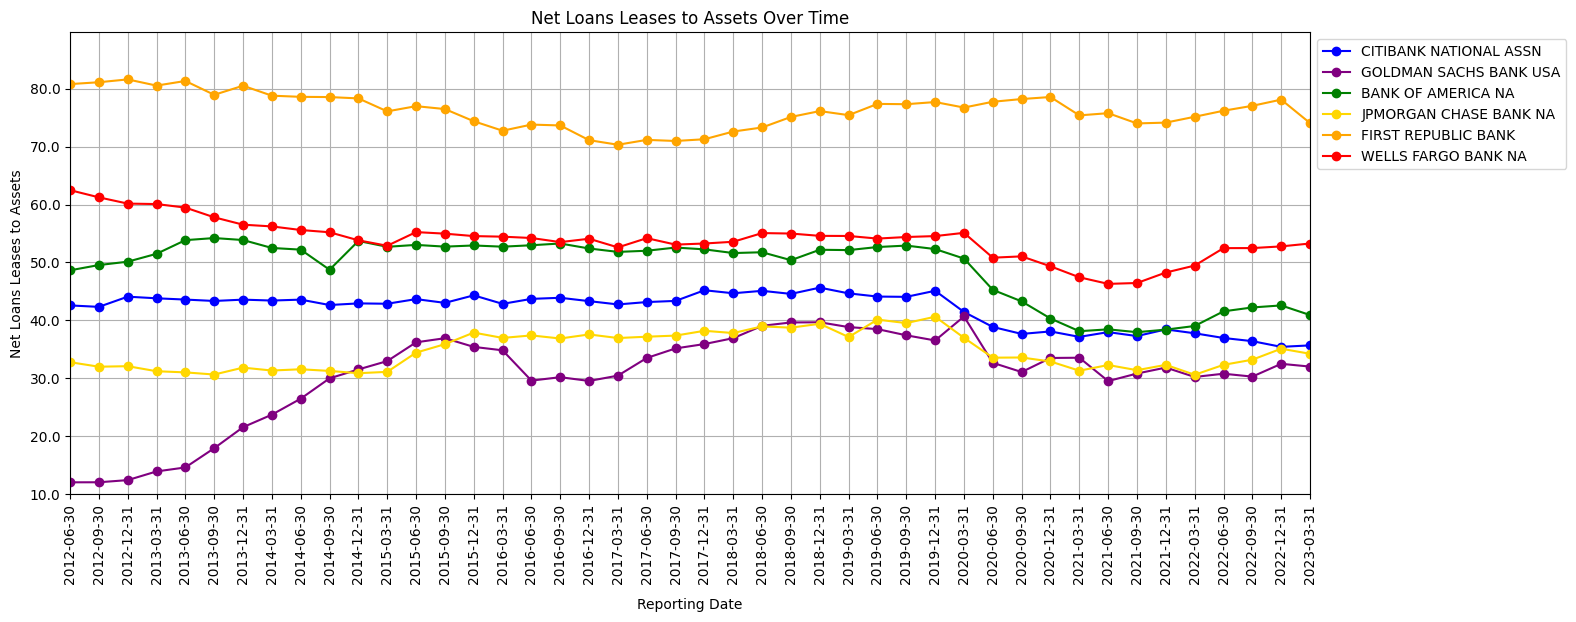

In [40]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Net Loans Leases to Assets"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Net Loans Leases to Assets Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Net Loans Leases to Assets")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = new_bank_perfor["Net Loans Leases to Assets"].max()
plt.ylim(10, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()


1. Net loans and leases to assests indicates the extent to which a bank's assets are tied up in lending activities relative to its total assets.Over the period from 2012 to 2023, an analysis of the Net Loans Leases to Assets ratio reveals notable variations in performance among different banks. First Republic Bank exhibited comparatively weaker performance, with a higher level of risk associated with its loan portfolio. This indicates potential challenges in managing and maintaining a balanced asset-to-loan ratio.

2. First Republic Bank's net loans and leases ratio consistently falls within the range of 70% to 80%, indicating a significantly weaker performance compared to the steady and stable range of 30% to 40% observed in Chase Bank. This substantial difference of 133% is alarming when considering Ye's analysis, which suggests that First Republic Bank may lack the capability to manage unforeseen cash outflows or navigate market fluctuations effectively.
.
- 2. Conversely, Goldman Sachs demonstrated a relatively lower level of risk in terms of its Net Loans Leases to Assets ratio. Although minor fluctuations were observed over the years, the bank showcased a consistent and prudent approach to managing its loan portfolio, emphasizing risk mitigation strategies.

- 3. JP Morgan Chase, positioned as the second-best performer in terms of Net Loans Leases to Assets ratio, showcased a higher level of stability and consistency compared to other banks. While not as low-risk as Goldman Sachs, JP Morgan Chase's performance indicates effective loan portfolio management and a balanced approach to asset allocation.

- These observations highlight the varying levels of risk and performance among banks, with First Republic Bank exhibiting higher risk, Goldman Sachs demonstrating lower risk, and JP Morgan Chase showing a stable and consistent performance. These insights can inform assessments of each bank's loan portfolio management and risk management strategies.

### Net Loans Leases to Deposits Over Time vs Reporting Date

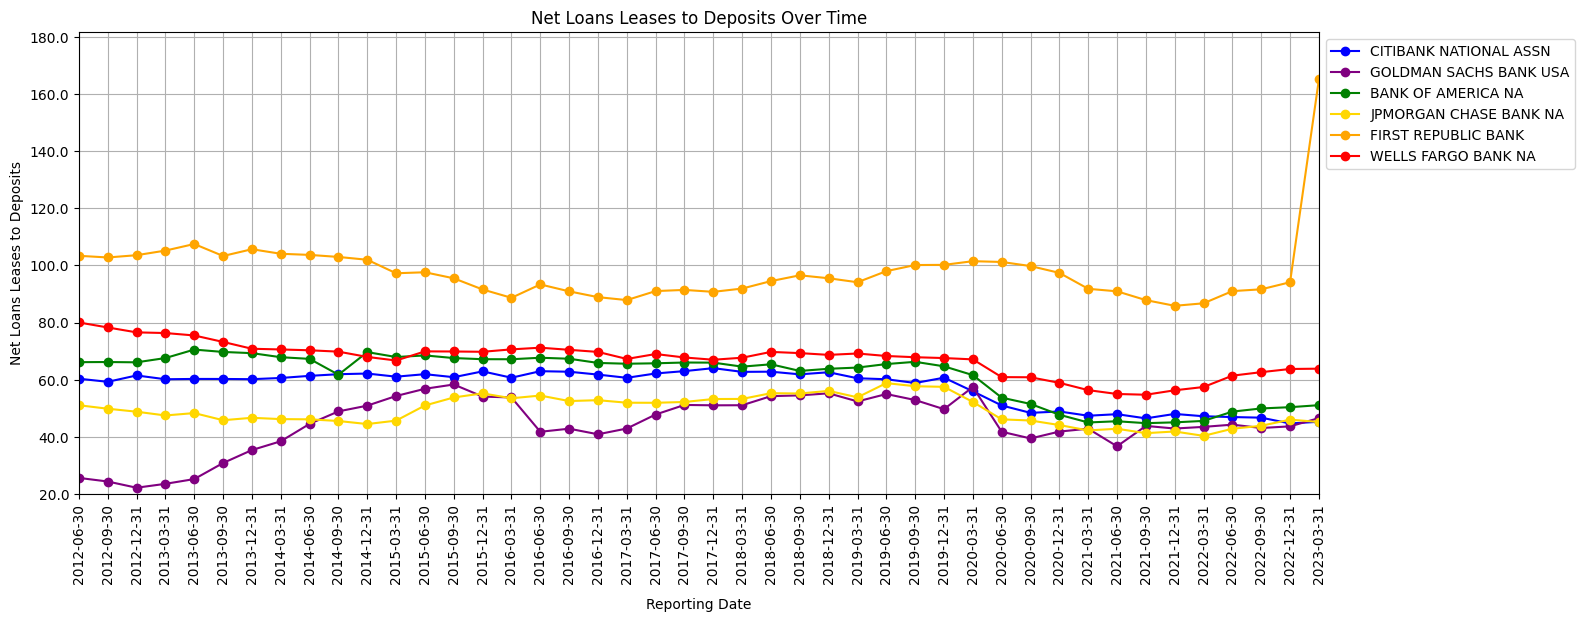

In [42]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Net Loans Leases to Deposits"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Net Loans Leases to Deposits Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Net Loans Leases to Deposits")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = new_bank_perfor["Net Loans Leases to Deposits"].max()
plt.ylim(20, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

- 1. The analysis of the Net Loans Leases to Deposits ratio for the period from 2012 to 2023 reveals significant variations in risk levels among different banks. First Republic Bank emerges as the bank with the highest risk, with the risk reaching its peak in the last quarter of the 2022-2023 financial year. This indicates potential challenges in maintaining a balanced ratio between loans and deposits.

- 2. In contrast, JP Morgan Chase demonstrates the second-lowest level of risk among the banks analyzed, positioned just below Goldman Sachs. This suggests that JP Morgan Chase has effectively managed its loan portfolio in relation to its deposit base, mitigating potential risks associated with lending activities.



- 3. Goldman Sachs exhibits several fluctuations in risk levels over the years, but overall maintains a relatively low-risk profile in terms of the Net Loans Leases to Deposits ratio. Chase, on the other hand, demonstrates a higher level of stability and consistency with a low-risk profile. This indicates effective risk management practices and a balanced approach to lending and deposit activities.
- These observations provide insights into the varying risk levels and risk management strategies employed by different banks. First Republic Bank emerges as a bank with higher risk, while JP Morgan Chase and Goldman Sachs showcase relatively lower risk profiles. Chase's consistency and stability further reinforce its prudent approach to managing the ratio between loans and deposits. These findings can assist in evaluating the risk exposure and loan portfolio management strategies of each bank.

### Net Loans Leases to CoreDeposit Over Time vs Reporting Date

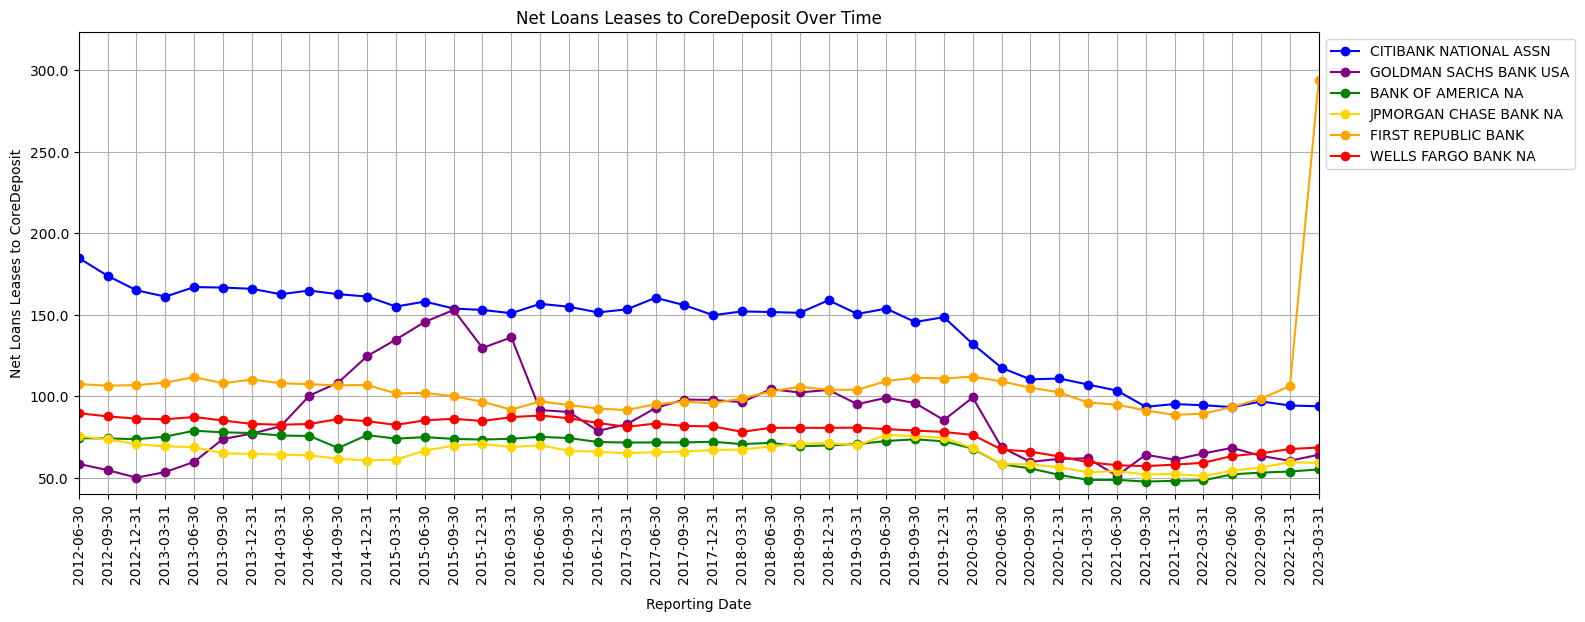

In [45]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Net Loans Leases to CoreDeposit"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Net Loans Leases to CoreDeposit Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Net Loans Leases to CoreDeposit")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = new_bank_perfor["Net Loans Leases to CoreDeposit"].max()
plt.ylim(40, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

- 1. An analysis of the Net Loans Leases to Core Deposit ratio reveals interesting patterns among different banks. From 2012 to 2022, Citibank consistently held the top position in this ratio, indicating a higher risk compared to other banks. However, at the start of the 2023 year, First Republic Bank surpassed Citibank in terms of risk, indicating a shift in their risk profile.

- 2. Bank of America and JP Morgan Chase demonstrated a lower level of risk compared to other banks, showcasing similar levels of consistency and stability. This suggests that these banks have effectively managed their loan portfolios relative to their core deposit base, resulting in a more balanced risk profile.

- 3. On the other hand, Goldman Sachs exhibited the highest level of fluctuation in the Net Loans Leases to Core Deposit ratio. While their risk levels varied over the years, they generally maintained a moderate risk profile. This indicates that Goldman Sachs experienced fluctuations in their loan portfolio relative to their core deposit base, potentially reflecting changes in market conditions or strategic decisions.

- These observations highlight the varying risk levels and risk management strategies among banks when it comes to the Net Loans Leases to Core Deposit ratio. Citibank initially held the highest risk, but First Republic Bank surpassed them in the 2023 year. Bank of America and JP Morgan Chase demonstrated lower risk and consistent performance, while Goldman Sachs exhibited higher fluctuation but maintained a moderate risk level. These insights can assist in assessing the risk exposure and loan portfolio management practices of each bank.

### Domestic Deposits to Total Assets Over Time vs Reporting Date

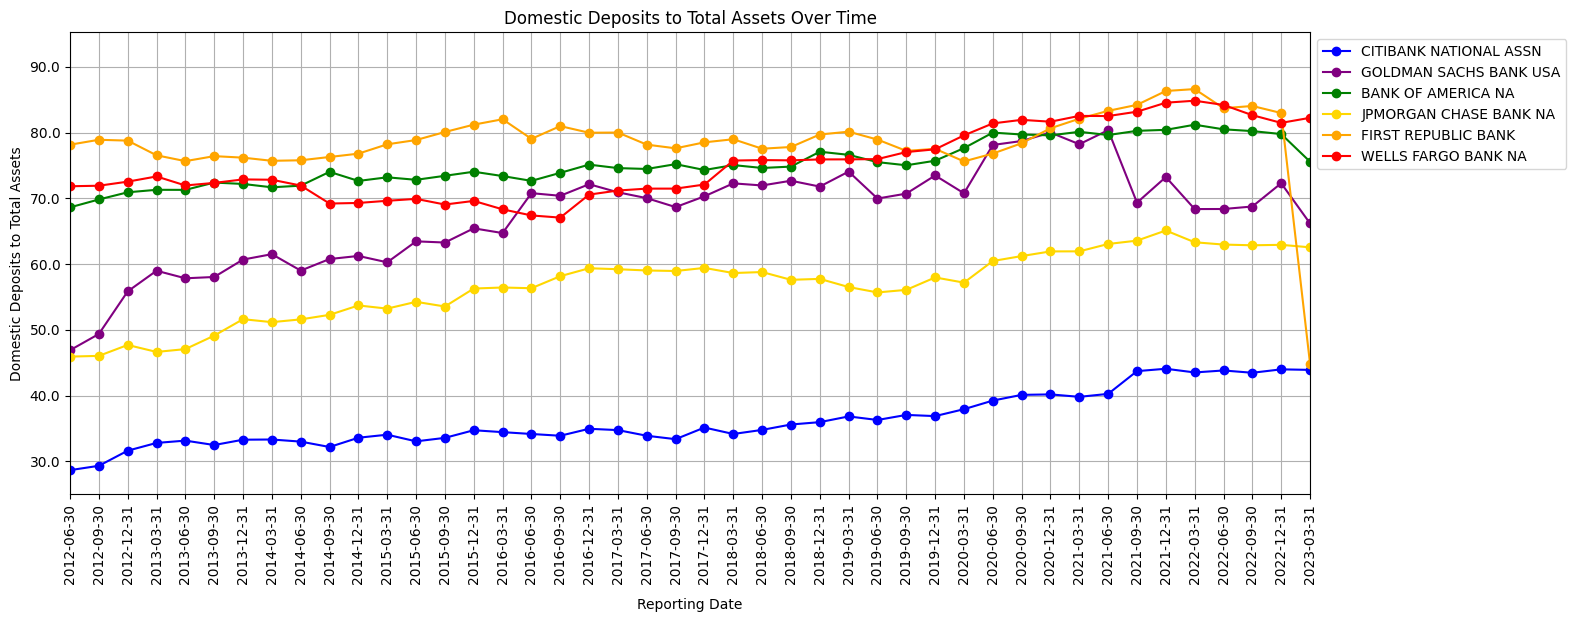

In [46]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Domestic Deposits to Total Assets"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Domestic Deposits to Total Assets Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Domestic Deposits to Total Assets")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = new_bank_perfor["Domestic Deposits to Total Assets"].max()
plt.ylim(25, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

- 1. The analysis of Domestic Deposits to Total Assets reveals that Citibank consistently maintained the lowest ratio compared to other banks during the period from 2012 to 2023. This suggests that Citibank had a relatively lower proportion of domestic deposits in relation to their total assets.

- 2. among all banks, First Republic Bank exhibits the highest ratio of domestic deposits this poor judgement presents liquidity risk and a lack of diversification. which ultimately contributed to their failure by the end of 2022.

- 3. JP Morgan Chase, on the other hand, displayed a relatively stable and consistent range of values for Domestic Deposits to Total Assets, primarily fluctuating between 45% to 65%. This suggests that JP Morgan Chase maintained a moderate level of domestic deposits in relation to their total assets, with a relatively steady pattern over time. A stable domestic asset ratio indicates that the bank has gained the trust and confidence of its domestic depositors. It also suggests that the bank can rely on a consistent pool of funds to support its lending and other banking operations.
- These observations provide insights into the composition of domestic deposits in relation to the total assets of different banks. Citibank consistently had the lowest ratio, while First Republic Bank and Bank of America showcased higher levels. JP Morgan Chase demonstrated a relatively stable and consistent pattern. These findings can aid in understanding the funding structure and deposit composition of each bank and may have implications for their overall financial stability and risk management.

### Tier 1 Risk Based Capital Ratio Over Reporting Date

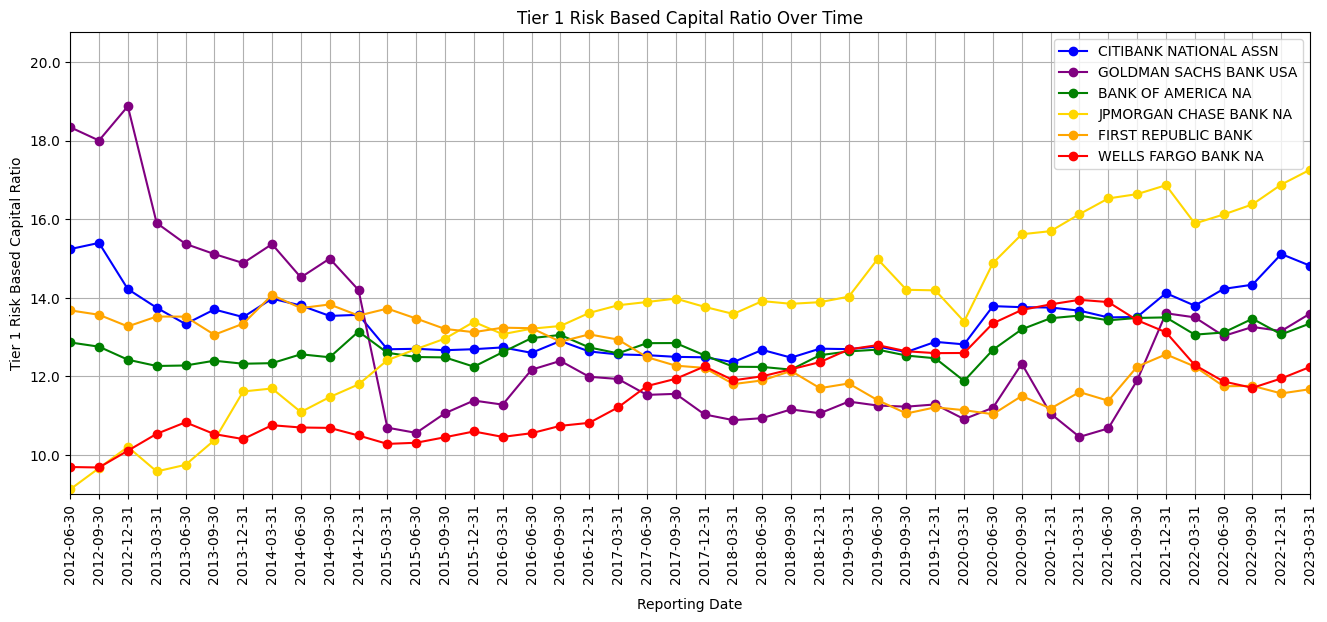

In [48]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Tier 1 Risk Based Capital Ratio"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
tick_labels = [datetime.strftime(date, "%Y-%m-%d") for date in bank_asset["Reporting Date"].unique()]
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Tier 1 Risk Based Capital Ratio Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Tier 1 Risk Based Capital Ratio")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = new_bank_perfor["Tier 1 Risk Based Capital Ratio"].max()
plt.ylim(9, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

# Show the plot
plt.show()

- 1. The Tier 1 Risk Based Capital Ratio analysis reveals an interesting trend for JP Morgan Chase. At the beginning of the decade in 2012, JP Morgan Chase had the lowest ratio, almost reaching zero.However In 2020 all banks had taken a plunge due to COVID19, even with this plunge Chase  made significant progress and emerged as the frontrunner among the competitor banks, achieving a remarkable Tier 1 Risk Based Capital Ratio of 17.0. Through proper risk management practices chase shows a 25.9259% increase while others such as first republic bank shows 8.18182% increase. This signifies a strong capital position and suggests that JP Morgan Chase has effectively managed its risk and maintained a solid capital buffer.
- 3. Goldman Sachs exhibited the highest level of fluctuation in the Tier 1 Risk Based Capital Ratio over the time period. The ratio varied considerably, indicating a higher degree of volatility and potentially reflecting the bank's exposure to various risk factors.

- These findings highlight the varying performances of banks in terms of their Tier 1 Risk Based Capital Ratio. JP Morgan Chase demonstrated remarkable progress, First Republic Bank showcased consistency, and Goldman Sachs exhibited higher fluctuations. The Tier 1 Risk Based Capital Ratio is an important metric that assesses a bank's capital adequacy and ability to absorb potential losses, providing insights into their risk management capabilities and financial stability.